<a href="https://colab.research.google.com/github/muhammadakbarazmi/PCVK_Genap_2022/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


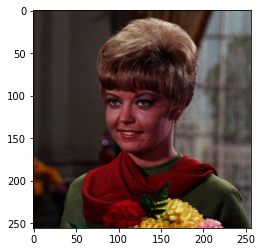

In [11]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/PCVK_SMTR6/Images/female.tiff')
images = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(images)

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


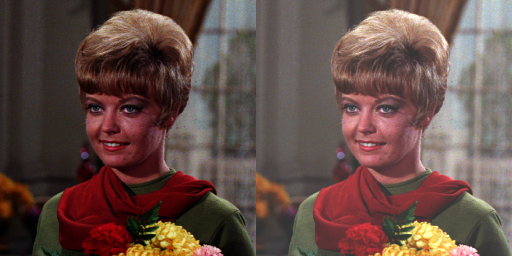

In [12]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_SMTR6/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**Tugas Praktikum**

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


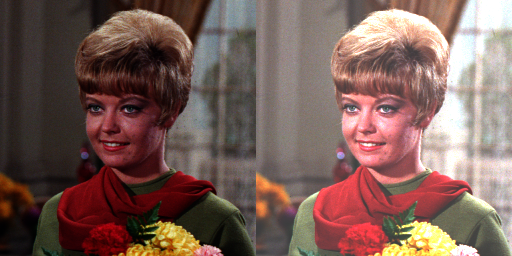

In [13]:
# 1. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
#    formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran
#    seperti berikut:

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_SMTR6/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame1 = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame1)

Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------------------------------
Masukkan nilai kecerahan: 40


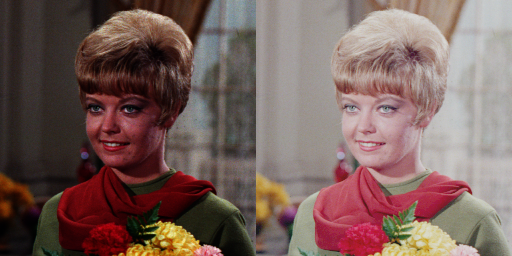

In [14]:
# 2. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
#    menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga
#    menghasilkan keluaran seperti berikut:


print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_SMTR6/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0, 255)

final_frame2 = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame2)

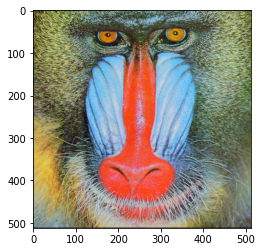

In [16]:
# 3. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
#    dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
#    bagian Ulasan Teori, sehingga menghasilkan keluaran sebagai berikut:

img_m = cv.imread('/content/drive/MyDrive/PCVK_SMTR6/Images/mandrill.tiff')
img_rgb = cv.cvtColor(img_m,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

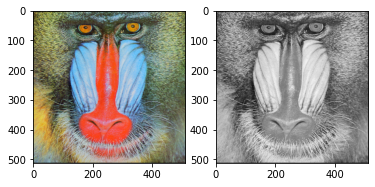

In [25]:
# a. Averaging 

img = cv.imread('/content/drive/MyDrive/PCVK_SMTR6/Images/mandrill.tiff')
color_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

#Cara 1
gray_img = np.mean(color_img, axis=2)
#axis=2 argument tells numpy.mean() to average value across all three color channels
#axis=0 would average across pixel rows 
#axis=1 would average across pixel columns


#Cara 2
'''for y in range (original.shape[0]):
    for x in range (original.shape[1]):
      gray_img[y,x] = np.mean(color_img[y,x])'''

f, ax = plt.subplots(1,2) #membuat 2 plot untuk citra input dan output
ax[0].imshow(color_img)
ax[1].imshow(gray_img, cmap='gray')

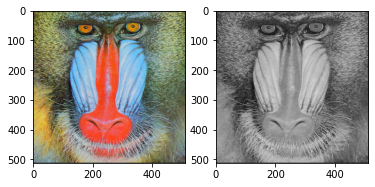

In [17]:
# b. Lightness

img_light = cv.imread('/content/drive/MyDrive/PCVK_SMTR6/Images/mandrill.tiff')
img_light[:] = np.max(img_light,axis=-1,keepdims=10)/2+np.min(img_light,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

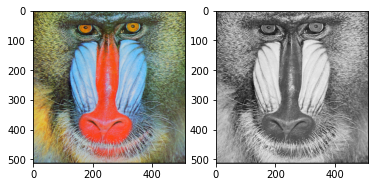

In [19]:
# c. Luminance

image_lum = cv.imread('/content/drive/MyDrive/PCVK_SMTR6/Images/mandrill.tiff')
R, G, B = image_lum[:,:,0], image_lum[:,:,1], image_lum[:,:,2]
gray_image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lum, cmap='gray')

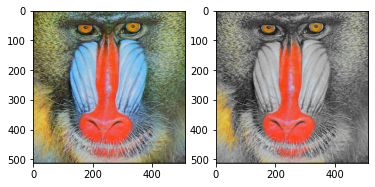

In [21]:
# 4. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
#    tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna
#    merah menjadi grayscale seperti pada contoh berikut:

img_4 = cv.imread('/content/drive/MyDrive/PCVK_SMTR6/Images/mandrill.tiff')
ret, mask = cv.threshold(img_4[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')